<a href="https://colab.research.google.com/github/sauryanshu55/convolutional-neural-networks-in-TensorFlow/blob/main/convolutional_neural_networks_and_computer_vision_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural networks and Computer Vision with TensorFlow

## Fetching the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-03 04:13:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   313MB/s    in 0.3s    

2022-08-03 04:13:23 (313 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak/train/steak

In [ ]:
# Walkthrough pizza_steak dir and list num of data
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"Directories: {len(dirnames)}, Images: {len(filenames)} in directory: '{dirpath}'\n")

Directories: 2, Images: 0 in directory: 'pizza_steak'

Directories: 2, Images: 0 in directory: 'pizza_steak/train'

Directories: 0, Images: 750 in directory: 'pizza_steak/train/pizza'

Directories: 0, Images: 750 in directory: 'pizza_steak/train/steak'

Directories: 2, Images: 0 in directory: 'pizza_steak/test'

Directories: 0, Images: 250 in directory: 'pizza_steak/test/pizza'

Directories: 0, Images: 250 in directory: 'pizza_steak/test/steak'



In [ ]:
# Visualize images
# Define classes for the images

import pathlib
import numpy as np

data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory 
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
#   plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['2146963.jpg']
Image shape: (512, 384, 3)


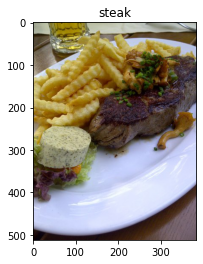

In [ ]:
# View a random image from the training data set
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="steak")

In [ ]:
import tensorflow as tf
print(f"Image as a Tensor:\n {tf.constant(img)}")
print(f"Tensor Shape: {tf.constant(img).shape}")

Image as a Tensor:
 [[[150 156 130]
  [152 158 132]
  [154 160 134]
  ...
  [125 127 114]
  [119 121 108]
  [115 117 104]]

 [[151 157 131]
  [153 159 133]
  [155 161 135]
  ...
  [148 151 140]
  [143 146 135]
  [140 143 132]]

 [[153 158 135]
  [155 160 137]
  [157 162 139]
  ...
  [168 171 160]
  [164 167 156]
  [162 165 154]]

 ...

 [[ 17   1   2]
  [ 17   1   2]
  [ 16   1   4]
  ...
  [106  90  91]
  [101  85  86]
  [ 96  80  80]]

 [[ 17   1   2]
  [ 17   1   4]
  [ 16   1   4]
  ...
  [104  88  89]
  [ 99  83  84]
  [ 94  78  78]]

 [[ 19   3   4]
  [ 19   3   6]
  [ 18   3   8]
  ...
  [103  87  88]
  [ 97  81  81]
  [ 92  76  76]]]
Tensor Shape: (512, 384, 3)


## Building a Convolutional Neural Network (CNN) model

In [ ]:
# CNN model

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Settting random seed
tf.random.set_seed(42)

# Preprocessing data by scaling/normalizing [pixel vals between 0-1]. Rescaling by 255 because max pixel val is 255
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# Setup path to data dir
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

# Import data from dirs and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42,
)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42,
)

# Build a CNN model (same as Tiny VGG neural network architecture)
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation=tf.keras.activations.relu,
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3, activation=tf.keras.activations.relu),
                                    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
                                    tf.keras.layers.Conv2D(10,3, activation="relu"),
                                    tf.keras.layers.Conv2D(10,3, activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the CNN model
history_1=model_1.fit(train_data,
                  epochs=5,
                  steps_per_epoch=len(train_data),
                  validation_data=valid_data,
                  validation_steps=len(valid_data),
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 219ms/step - loss: 0.9693 - accuracy: 0.5487 - val_loss: 0.5774 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.5491 - accuracy: 0.7573 - val_loss: 0.4445 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6488 - accuracy: 0.6867 - val_loss: 0.5530 - val_accuracy: 0.7260
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.5568 - accuracy: 0.7827 - val_loss: 0.4249 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.5511 - accuracy: 0.7940 - val_loss: 0.5010 - val_accuracy: 0.7760


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Preprocess Data

In [ ]:
# Define directory dataset path
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [ ]:
# Check GPU
!nvidia-smi

Wed Aug  3 04:14:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |   2348MiB / 15109MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainn_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load img data from directories and turn them into batches

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32,) 

test_data=train_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32,)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Create the model

In [ ]:
# Create a CNN model (start with a baseline)

from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create a baseline one layer convolutional neural network

model_4=Sequential([
                    Conv2D(filters=10, 
                           kernel_size=3,
                           strides=1, 
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3)), # Input layer, specifying input shape
                    
                    Conv2D(10,3,activation="relu"),

                    Conv2D(10,3,activation="relu"),

                    Flatten(),
                    Dense(1, activation="sigmoid") #Output layer, working with binary classificcation so 1
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## Fit the model

In [ ]:
# Check the lengths of training and test data
len(train_data), len(test_data)
# Batch size=32

(47, 16)

In [ ]:
history_4=model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 1.3226 - accuracy: 0.6573 - val_loss: 0.5104 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4650 - accuracy: 0.7987 - val_loss: 0.3894 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3608 - accuracy: 0.8547 - val_loss: 0.3966 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.2378 - accuracy: 0.9147 - val_loss: 0.3908 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.1440 - accuracy: 0.9640 - val_loss: 0.3670 - val_accuracy: 0.8300


## Evaluating our model


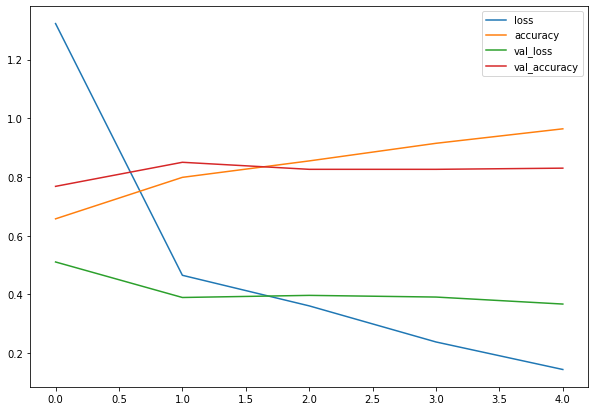

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [13]:
 # Plot the validation and training curves separately

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

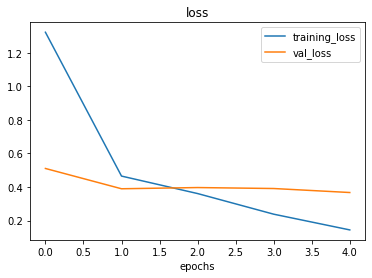

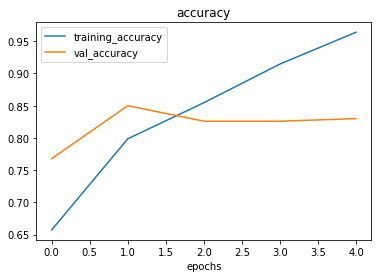

In [ ]:
plot_loss_curves(history_4)

In [ ]:
# If validation loss starts to increase, then the model is overfitting. The graph shows validation data is increasing 

## Adujusting model overfitting

In [ ]:
# Creating a new baseline model
# REDUCING OVERFITTING BY ADDING MAXPOOL LAYER!

model_5=Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2), # To reduce overfitting, maxpool finds the max of the kernel matrix, reducing the output shape
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid' )
])

In [ ]:
# Compile the model
model_5.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics='accuracy',
)

In [ ]:
# Fit the model
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(valid_data),
)

Epoch 1/5
47/47 [==============================] - 10s 192ms/step - loss: 0.6407 - accuracy: 0.6380 - val_loss: 0.5247 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.5080 - accuracy: 0.7480 - val_loss: 0.4286 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4300 - accuracy: 0.8107 - val_loss: 0.3846 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4156 - accuracy: 0.8160 - val_loss: 0.3657 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3899 - accuracy: 0.8253 - val_loss: 0.3529 - val_accuracy: 0.8360


In [ ]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
# Check loss & accuracy curves to check overfitting

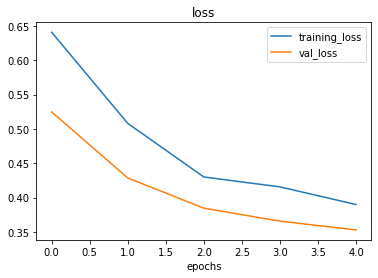

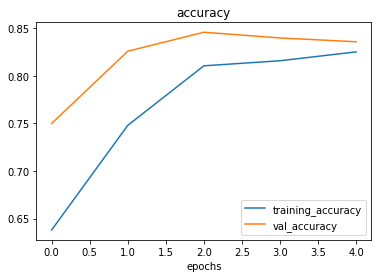

In [ ]:
plot_loss_curves(history_5)

In [ ]:
## REDUCE OVERFITTING BY ADDING DATA AUGMENTATION! (aka Regularization)

In [ ]:
# Create ImageDataGenerator training data with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, 
                                             width_shift_range=0.2,                                              height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True,
                                             )  

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) 

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")


Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() 

showing image number: 23


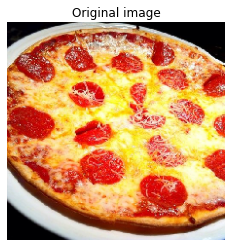

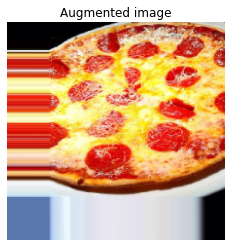

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model_6 on augmented training data
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 476ms/step - loss: 0.7098 - accuracy: 0.4480 - val_loss: 0.6906 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 22s 466ms/step - loss: 0.6894 - accuracy: 0.6033 - val_loss: 0.6772 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 22s 479ms/step - loss: 0.6961 - accuracy: 0.5273 - val_loss: 0.6775 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 23s 490ms/step - loss: 0.6865 - accuracy: 0.5513 - val_loss: 0.6382 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 22s 472ms/step - loss: 0.7040 - accuracy: 0.6300 - val_loss: 0.6312 - val_accuracy: 0.5720


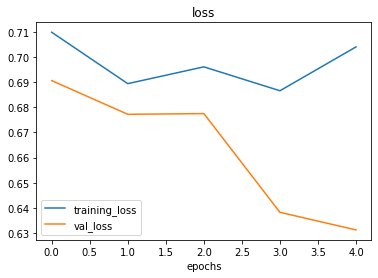

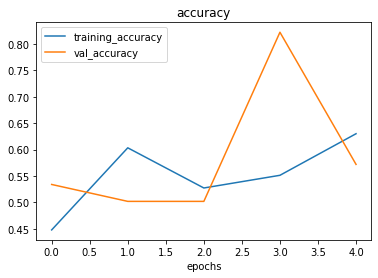

In [ ]:
# Check training curves
plot_loss_curves(history_6)

In [ ]:
# Shuffling data to improve model accuracy

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                     
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(), 
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 484ms/step - loss: 0.6625 - accuracy: 0.5867 - val_loss: 0.5508 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 23s 490ms/step - loss: 0.5904 - accuracy: 0.6767 - val_loss: 0.4759 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 22s 472ms/step - loss: 0.5459 - accuracy: 0.7240 - val_loss: 0.3762 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.5056 - accuracy: 0.7473 - val_loss: 0.4079 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4719 - accuracy: 0.7807 - val_loss: 0.3385 - val_accuracy: 0.8660


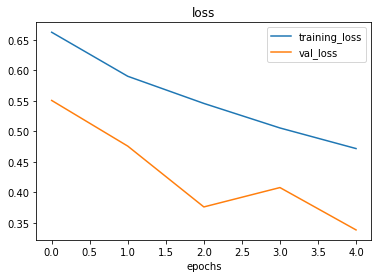

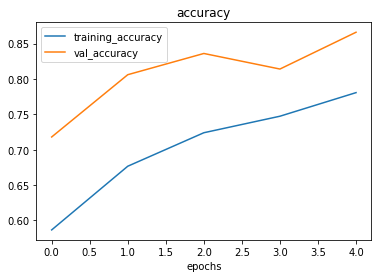

In [ ]:
plot_loss_curves(history_7)

## Make predictions on custom image

--2022-08-03 04:20:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-08-03 04:20:20 (45.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



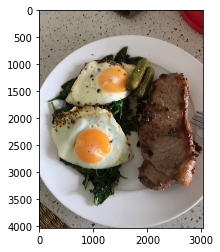

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
# plt.axis(False)

In [ ]:
# Check shape of image before fitting it to model
print(f"Shape={steak.shape}")

Shape=(4032, 3024, 3)


## Preprocess custom data

In [46]:
# Create method to import image and resize to use it in model

def load_and_prep_image(filename, img_shape=224):
    """Reads immage from filename, turns into tensor, 
    and reshapes to (img_shape, img_shape, color_channels)"""

    # Read the image
    img=tf.io.read_file(filename)

    # Decode the read file into a tensor
    img=tf.image.decode_image(img)

    # Resize the image
    img=tf.image.resize(img, size=[img_shape, img_shape])

    # Rescale the image
    img=img/255.

    return img

In [ ]:
# Load and pre-process custom images
steak=load_and_prep_image('03-steak.jpeg')
print(steak)
print(f"\n\nShape={steak.shape}")

tf.Tensor(
[[[0.6377451  0.6220588  0.57892156]
  [0.6504902  0.63186276 0.5897059 ]
  [0.63186276 0.60833335 0.5612745 ]
  ...
  [0.52156866 0.05098039 0.09019608]
  [0.49509802 0.04215686 0.07058824]
  [0.52843136 0.07745098 0.10490196]]

 [[0.6617647  0.6460784  0.6107843 ]
  [0.6387255  0.6230392  0.57598037]
  [0.65588236 0.63235295 0.5852941 ]
  ...
  [0.5352941  0.06862745 0.09215686]
  [0.529902   0.05931373 0.09460784]
  [0.5142157  0.05539216 0.08676471]]

 [[0.6519608  0.6362745  0.5892157 ]
  [0.6392157  0.6137255  0.56764704]
  [0.65637255 0.6269608  0.5828431 ]
  ...
  [0.53137255 0.06470589 0.08039216]
  [0.527451   0.06862745 0.1       ]
  [0.52254903 0.05196078 0.0872549 ]]

 ...

 [[0.49313724 0.42745098 0.31029412]
  [0.05441177 0.01911765 0.        ]
  [0.2127451  0.16176471 0.09509804]
  ...
  [0.6132353  0.59362745 0.57009804]
  [0.65294117 0.6333333  0.6098039 ]
  [0.64166665 0.62990195 0.59460783]]

 [[0.65392154 0.5715686  0.45      ]
  [0.6367647  0.54656863 0

In [ ]:
# Getting image predictions
pred=model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.798293]], dtype=float32)

In [ ]:
# Converting prediction probabilities to class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
    img=load_and_prep_image(filename)
    pred=model.predict(tf.expand_dims(img, axis=0))
    # pred_confidence=pred[0]
    pred_class=class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False);

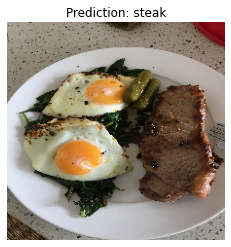

In [ ]:
pred_and_plot(
    model=model_7,
    filename='03-steak.jpeg'
)

--2022-08-03 04:20:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2022-08-03 04:20:23 (64.8 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



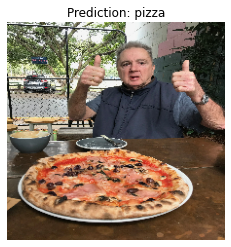

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, '03-pizza-dad.jpeg')

# Multiclass image classification

## Fetching the data

In [1]:
# Import data

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref=zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2022-08-03 06:16:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.251.111.128, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   173MB/s    in 2.9s    

2022-08-03 06:16:59 (173 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os
for dirpath,dirnames,filenames in os.walk('10_food_classes_all_data'):
    print(f'Directories: {len(dirnames)} Files: {len(filenames)} in {dirpath}')
# there could be .DS_Store file as well10_food_classes_all_data.zip

Directories: 2 Files: 0 in 10_food_classes_all_data
Directories: 10 Files: 0 in 10_food_classes_all_data/train
Directories: 0 Files: 750 in 10_food_classes_all_data/train/sushi
Directories: 0 Files: 750 in 10_food_classes_all_data/train/fried_rice
Directories: 0 Files: 750 in 10_food_classes_all_data/train/pizza
Directories: 0 Files: 750 in 10_food_classes_all_data/train/ice_cream
Directories: 0 Files: 750 in 10_food_classes_all_data/train/steak
Directories: 0 Files: 750 in 10_food_classes_all_data/train/chicken_curry
Directories: 0 Files: 750 in 10_food_classes_all_data/train/grilled_salmon
Directories: 0 Files: 750 in 10_food_classes_all_data/train/hamburger
Directories: 0 Files: 750 in 10_food_classes_all_data/train/ramen
Directories: 0 Files: 750 in 10_food_classes_all_data/train/chicken_wings
Directories: 10 Files: 0 in 10_food_classes_all_data/test
Directories: 0 Files: 250 in 10_food_classes_all_data/test/sushi
Directories: 0 Files: 250 in 10_food_classes_all_data/test/fried_ric

In [3]:
# Setup train and test directories

train_dir='10_food_classes_all_data/train/'
test_dir='10_food_classes_all_data/test/'

In [4]:
# Class names
import pathlib
import numpy as np

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1155665.jpg']
Image shape: (512, 512, 3)


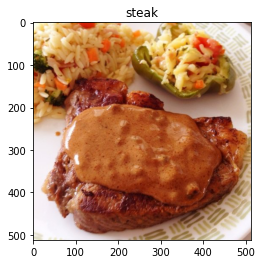

In [10]:
# Visualize data
import random

img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

## Preprocessing the data

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale/ Normalize
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data and turn it into batches

IMG_SIZE=(224,224)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


##  Create the model

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model_8=Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation='relu'),

    Conv2D(10,3, activation='relu'),
    MaxPool2D(),

    Conv2D(10,3, activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(10, activation='softmax')
])

model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

## Fit the model

In [8]:
history_8=model_8.fit(train_data, # This has 10 classes now
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      )

Epoch 1/5
235/235 [==============================] - 64s 215ms/step - loss: 2.1074 - accuracy: 0.2441 - val_loss: 1.9629 - val_accuracy: 0.3076
Epoch 2/5
235/235 [==============================] - 48s 205ms/step - loss: 1.8943 - accuracy: 0.3420 - val_loss: 1.9346 - val_accuracy: 0.3288
Epoch 3/5
235/235 [==============================] - 47s 199ms/step - loss: 1.6890 - accuracy: 0.4317 - val_loss: 1.9696 - val_accuracy: 0.3272
Epoch 4/5
235/235 [==============================] - 47s 201ms/step - loss: 1.2936 - accuracy: 0.5652 - val_loss: 2.0861 - val_accuracy: 0.3304
Epoch 5/5
235/235 [==============================] - 46s 196ms/step - loss: 0.7616 - accuracy: 0.7500 - val_loss: 2.5985 - val_accuracy: 0.3192


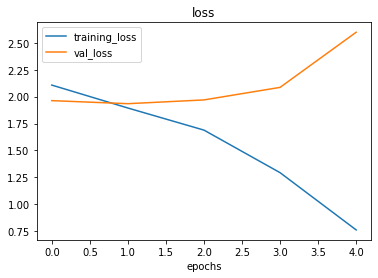

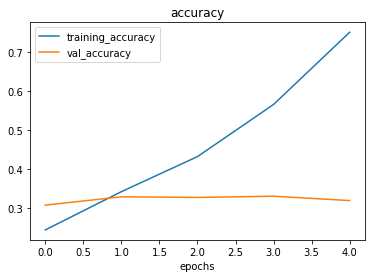

In [14]:
# Check out the loss curves of model_9
plot_loss_curves(history_8)

The model is overfitting the training set. It does well on the training data but fails to generalize and perfoms poorly on test data

## Adjust the model hyperparameters to beat the baseline/ reduce overfitting
+ Data augmentation
+ Simplify the model: Reduce # of layers and reduce # hiffen layers
+ Transfer learning
+ More data

In [15]:
# Simplify the model
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [17]:
# Remove 2 convolutional layers
model_9=Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation='relu'),

    Conv2D(10,3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [20]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 121000)            0         
                                                                 
 dense_1 (Dense)             (None, 10)                1210010   
                                                      

In [19]:
# Fit the model
history_9=model_9.fit(train_data, # This has 10 classes now
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      )

Epoch 1/5
235/235 [==============================] - 47s 198ms/step - loss: 2.4443 - accuracy: 0.2391 - val_loss: 1.9162 - val_accuracy: 0.3328
Epoch 2/5
235/235 [==============================] - 45s 193ms/step - loss: 1.6888 - accuracy: 0.4293 - val_loss: 1.8553 - val_accuracy: 0.3524
Epoch 3/5
235/235 [==============================] - 46s 196ms/step - loss: 1.0159 - accuracy: 0.6864 - val_loss: 2.2582 - val_accuracy: 0.3080
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 0.3531 - accuracy: 0.9113 - val_loss: 2.7810 - val_accuracy: 0.2848
Epoch 5/5
235/235 [==============================] - 45s 192ms/step - loss: 0.0921 - accuracy: 0.9844 - val_loss: 3.3648 - val_accuracy: 0.2888


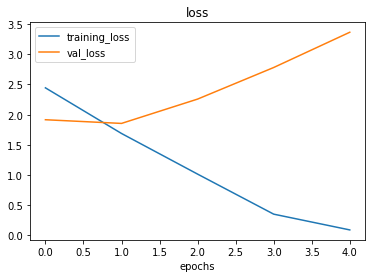

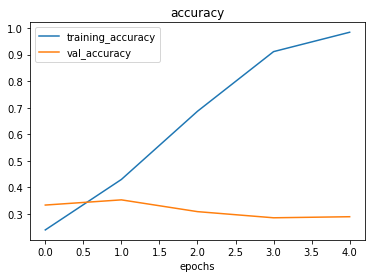

In [21]:
plot_loss_curves(history=history_9)

## Using data augmentation to try to improve overfitting

In [36]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [37]:
# Clone and fit the model
model_10=tf.keras.models.clone_model(model_8)

# compile
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10=model_10.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 47s 200ms/step - loss: 2.1763 - accuracy: 0.1891 - val_loss: 2.0601 - val_accuracy: 0.2520
Epoch 2/5
235/235 [==============================] - 46s 197ms/step - loss: 1.9087 - accuracy: 0.3316 - val_loss: 1.8769 - val_accuracy: 0.3440
Epoch 3/5
235/235 [==============================] - 45s 191ms/step - loss: 1.5715 - accuracy: 0.4728 - val_loss: 1.8894 - val_accuracy: 0.3460
Epoch 4/5
235/235 [==============================] - 46s 195ms/step - loss: 1.1055 - accuracy: 0.6367 - val_loss: 2.1272 - val_accuracy: 0.3372
Epoch 5/5
235/235 [==============================] - 45s 193ms/step - loss: 0.5791 - accuracy: 0.8153 - val_loss: 2.8639 - val_accuracy: 0.3040


In [38]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 2.8639 - accuracy: 0.3040


[2.863929271697998, 0.30399999022483826]

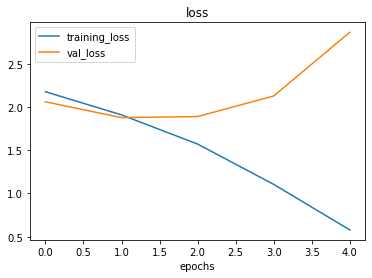

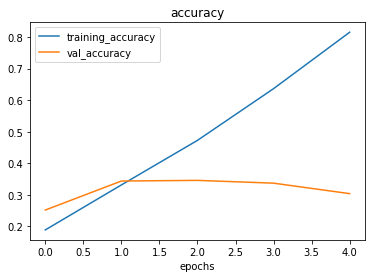

In [39]:
plot_loss_curves(history=history_10)

## Making a prediction on the trained model

In [40]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [42]:
# Download custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2022-08-03 07:11:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-08-03 07:11:16 (225 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-08-03 07:11:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [47]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

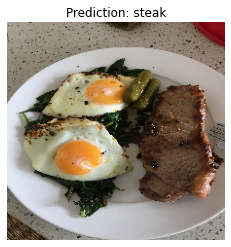

In [51]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

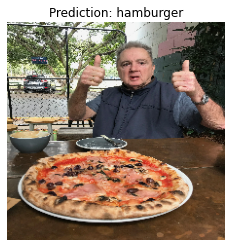

In [50]:
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

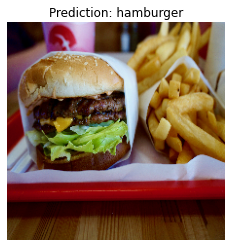

In [54]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

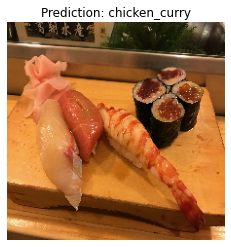

In [53]:
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

In [55]:
## Saving the model
model_10.save('saved_trained_model_10')

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


INFO:tensorflow:Assets written to: saved_trained_model_10/assets
